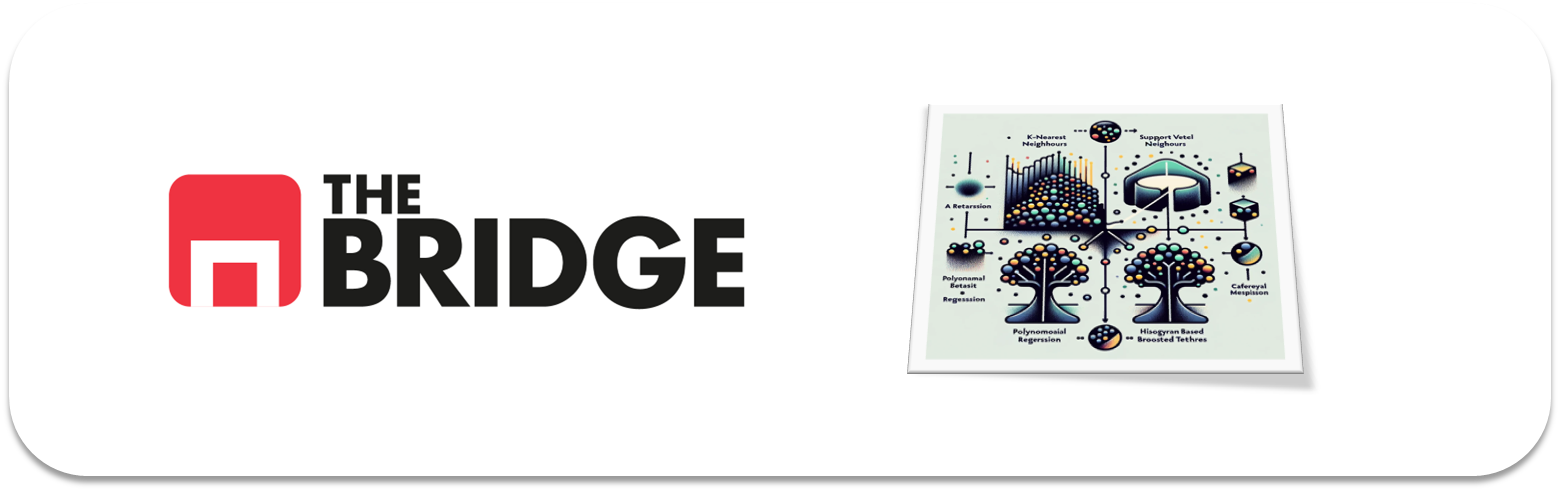

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [8]:
df = pd.read_csv("./data/wines_dataset.csv", sep="|")


In [16]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white


Para el caso del objetivo de negocio numero 1 la variable target utilizada será la de **quality** (Clasificador). 

Para el segundo problema de negocio usaré una regresión debido a que se busca saber una variable continua y usaré como variable target **Alcohol**

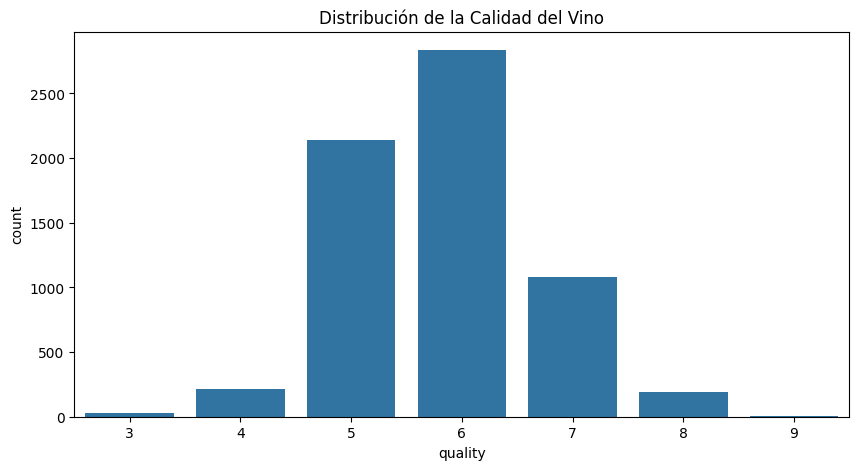

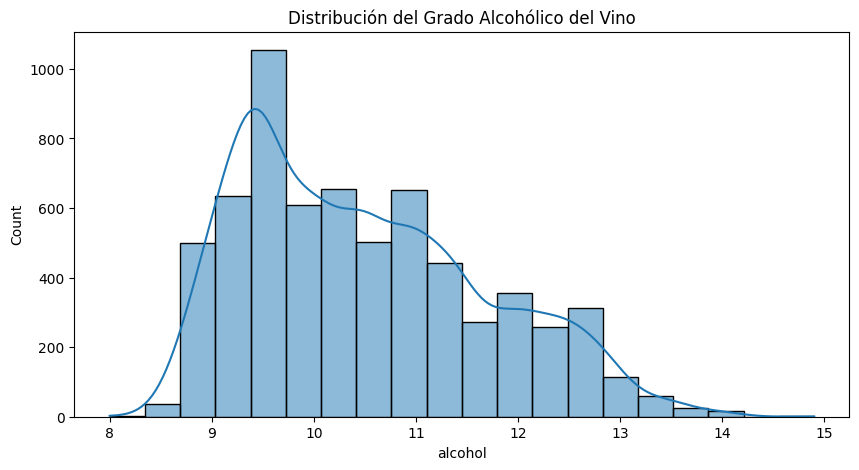

In [17]:
# Histograma para la variable 'calidad'
plt.figure(figsize=(10, 5))
sns.countplot(x='quality', data=df)
plt.title('Distribución de la Calidad del Vino')
plt.show()

# Histograma para la variable 'alcohol'
plt.figure(figsize=(10, 5))
sns.histplot(df['alcohol'], bins=20, kde=True)
plt.title('Distribución del Grado Alcohólico del Vino')
plt.xlabel('alcohol')
plt.show()

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

### #2 Modelado para clasificación

#### Antes de generar cualquier modelo:

1-Transformo las variables categoricas para que no den error

2-Separo los datos entre train y test como siempre en 80-20

3-Estandarizo las variables features

In [37]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Transformo variables categóricas en valores numéricos
for col in categorical_cols:
    if col != 'quality':  # No lo hago con quality
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separo características y variable objetivo
X = df.drop('quality', axis=1)  # Características
y = df['quality']  # Variable objetivo

# Divido el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizo las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelo KNN

In [42]:
# modelo KNN
knn1 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
knn2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

# Evaluo con validación cruzada
scores_knn1 = cross_val_score(knn1, X_train, y_train, cv=5, scoring='recall_weighted')
scores_knn2 = cross_val_score(knn2, X_train, y_train, cv=5, scoring='recall_weighted')

# Printeo resultados de recall
print(f"KNN (k=3) Recall Medio: {scores_knn1.mean()}")
print(f"KNN (k=5) Recall Medio: {scores_knn2.mean()}")


KNN (k=3) Recall Medio: 0.54666173095432
KNN (k=5) Recall Medio: 0.5530121418523728


## Modelo Regresión Logistica

In [43]:
# Creación modelo de Regresión Logística
logistic = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Evaluo con validación cruzada
scores_logistic = cross_val_score(logistic, X_train, y_train, cv=5, scoring='recall_weighted')
# Printeo recall del modelo
print(f"Regresión Logística Recall Medio: {scores_logistic.mean()}")


Regresión Logística Recall Medio: 0.5447371733175391


## Modelo Random Forest

In [45]:

# Creacion  del modelo de Random Forest
rf = RandomForestClassifier()

# Evaluar con validación cruzada
scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall_weighted')

# Printeo resultados de Recall
print(f"Random Forest Recall Medio: {scores_rf.mean()}")

Random Forest Recall Medio: 0.664997408751018


## Optimización de Hiperparámetros


In [47]:
# Definir el grid de parámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

# Crear el modelo de Random Forest
rf = RandomForestClassifier()

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='recall_weighted', cv=5)
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor recall medio
print(f"Mejores Parámetros: {grid_search.best_params_}")
print(f"Mejor Recall Medio: {grid_search.best_score_}")


Mejores Parámetros: {'max_depth': 30, 'n_estimators': 200}
Mejor Recall Medio: 0.6721176056859406


## Evaluación del Modelo y Análisis de Errores


In [48]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.70      0.16      0.26        43
           2       0.75      0.73      0.74       432
           3       0.67      0.79      0.72       562
           4       0.66      0.56      0.60       210
           5       0.88      0.49      0.63        47

    accuracy                           0.70      1300
   macro avg       0.61      0.45      0.49      1300
weighted avg       0.70      0.70      0.69      1300



### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

## Pasos previos al modelo
1-Transformo variables

2-Separo dataset entre train y test 

3-Estandarizo

In [50]:
# Identificar y transformar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != 'alcohol':  # No transformes 'alcohol' ya que es la variable objetivo
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

# Separar características y variable objetivo
X = df.drop('alcohol', axis=1)  # Características
y = df['alcohol']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un pipeline que incluye la estandarización para los modelos
pipeline = make_pipeline(StandardScaler())

Utilizaré tres modelos de regresión. Usaremos la métrica R2 (coeficiente de determinación) y MSE (Error Cuadrático Medio) para evaluar el rendimiento de los modelos.

## Regresión lineal

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Creación del modelo de Regresión Lineal
linear_model = make_pipeline(StandardScaler(), LinearRegression())

# Evaluo con validación cruzada
scores_linear = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')
print(f"Regresión Lineal R^2 Medio: {scores_linear.mean()}")


Regresión Lineal R^2 Medio: 0.8135256332090274


## Arbol de decisión

In [53]:
from sklearn.tree import DecisionTreeRegressor

# Creación del modelo de Árbol de Decisión
tree_model = make_pipeline(StandardScaler(), DecisionTreeRegressor())

# Evaluo con validación cruzada
scores_tree = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='r2')
print(f"Árbol de Decisión R^2 Medio: {scores_tree.mean()}")

Árbol de Decisión R^2 Medio: 0.7556443618513962


# Random Forest en regresión

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Creación del modelo de Random Forest
rf_model = make_pipeline(StandardScaler(), RandomForestRegressor())

# Evaluo con validación cruzada
scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Random Forest R^2 Medio: {scores_rf.mean()}")

Random Forest R^2 Medio: 0.8828636007789337


## Optimización de hiperparámetros

Lo haremos con el caso de Random Forest ya que es el que mejor R2 ha dado

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor()

# Definir el pipeline con estandarización
pipeline = make_pipeline(StandardScaler(), rf_model)

# Definir el grid de parámetros para RandomForestRegressor
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor R^2
print(f"Mejores Parámetros: {grid_search.best_params_}")
print(f"Mejor R^2: {grid_search.best_score_}")


Mejores Parámetros: {'randomforestregressor__max_depth': 30, 'randomforestregressor__n_estimators': 200}
Mejor R^2: 0.8841389394279446


## Evaluación del modelo escogido 

In [58]:
best_model = grid_search.best_estimator_  # o el modelo seleccionado sin optimización
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"R^2: {r2}")


Error Cuadrático Medio (MSE): 0.16222701686333796
R^2: 0.884887730607883


## Análisis de errores (gráficamente con el residuo entre los dos erorres)

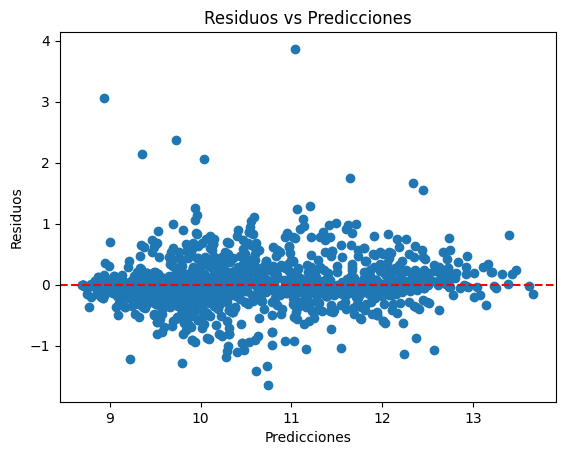

In [59]:
import matplotlib.pyplot as plt

# Calcular residuos
residuals = y_test - y_pred

# Graficar residuos
plt.scatter(y_pred, residuals)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
